In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

In [76]:
# Raw infromation
num_questions = 10
num_selection = 6
correct_answers = {'Question #1': 1,
                   'Question #2': 2,
                   'Question #3': 4,
                   'Question #4': 3,
                   'Question #5': 3,
                   'Question #6': 2,
                   'Question #7': 1,
                   'Question #8': 4,
                   'Question #9': 1,
                   'Question #10': 3} # based on index

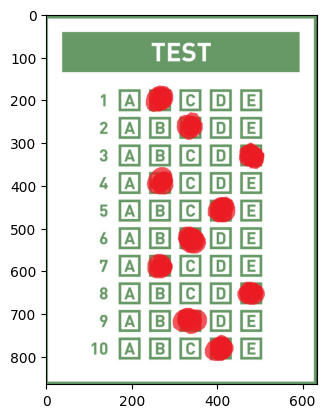

In [3]:
# reading result_sheet
answers = cv.imread('dtmjavob.png')
answers = cv.cvtColor(answers, cv.COLOR_BGR2RGB)
plt.imshow(answers)
plt.show()

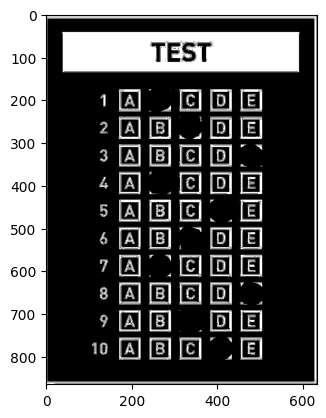

In [4]:
# Coverting black-white format 
LR2 = np.array([0, 150, 0])
UR2= np.array([200, 255, 200])
mask = cv.inRange(answers, LR2, UR2)
plt.imshow(mask, cmap = 'gray')
plt.show()

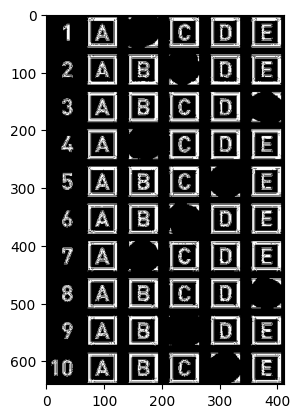

In [5]:
# Slicing only processsing area
frame = mask[170:810, 98:510]
plt.imshow(frame, cmap = 'gray')
plt.show()

In [6]:
frame.shape

(640, 412)

In [7]:
# Resizing shape - (640, 412) 'num_questions' & 'num_selection' propotionally
re_frame = cv.resize(frame, (408, 640)) # (640, 412) ~==~ (640, 408)

In [8]:
# 640 / num_questions = 54 & 408 / num_selection = 68

In [14]:
# Horizontal split 
rows = np.vsplit(re_frame, num_questions)

In [27]:
print(type(rows))

<class 'list'>


In [15]:
len(rows)

10

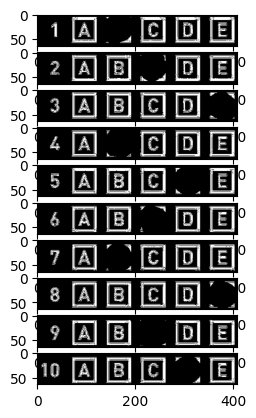

In [43]:
# Showing each row
for i in range(1, len(rows) + 1):
    plt.subplot(10,1,i)
    plt.imshow(rows[i-1], cmap='gray')
plt.show()

In [33]:
# Vertical split
data = []
for row in rows:
    cols = np.hsplit(row, num_selection)
    data.append(col)

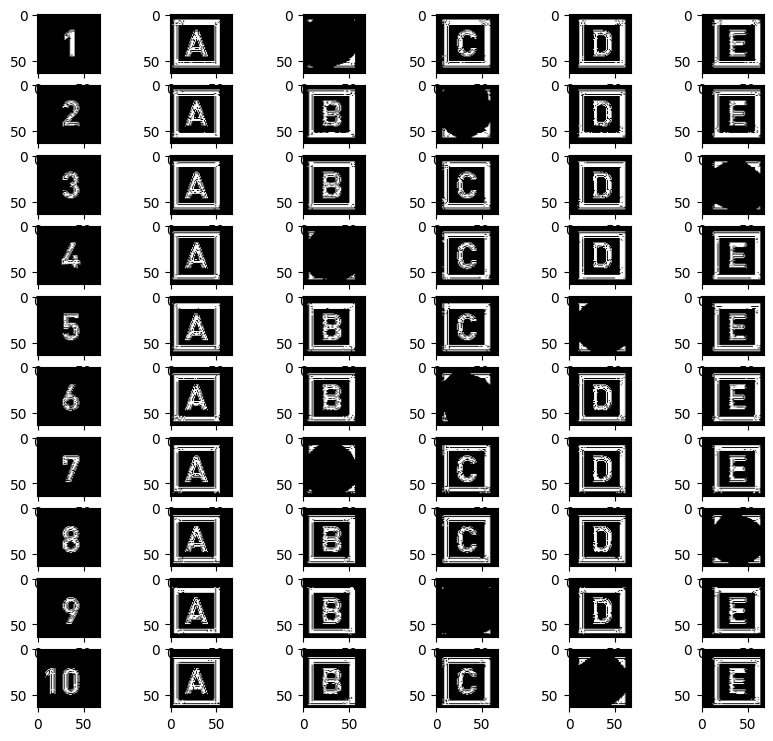

In [44]:
# Showing individual cell
fig,axes = plt.subplots(num_questions, num_selection, figsize=(10,9))

for i in range(num_questions):
    for j in range(num_selection):
        axes[i][j].imshow(data[i][j], cmap ='gray')
plt.show()

In [50]:
# determining each cell's sum_pixels
sum_pixels =[]
for i in range(num_questions):
    row_pixels = []
    for j in range(1, num_selection):
        row_pixels.append(np.sum(data[i][j]))
    sum_pixels.append(row_pixels)

In [51]:
sum_pixels

[[287635, 33081, 293107, 302845, 296981],
 [274501, 303972, 53276, 293755, 289905],
 [280055, 303211, 281492, 294258, 47221],
 [263643, 19693, 275680, 285674, 284092],
 [288893, 316594, 291335, 26516, 295711],
 [269204, 294623, 35094, 284661, 280565],
 [267435, 39390, 269372, 282139, 280567],
 [274245, 301452, 279220, 292240, 48224],
 [264401, 291605, 5051, 279359, 274007],
 [267936, 291853, 269881, 42174, 279804]]

In [52]:
# min(sum_pixels[i]) = sdudent's selection
mins_idx = []
for question in sum_pixels:
    mins_idx.append(question.index(min(question)))

In [54]:
# Answers
mins_idx

[1, 2, 4, 1, 3, 2, 1, 4, 2, 3]

In [77]:
# Correct answers
correct_answers = list(correct_answers.values())

In [79]:
# Grading
matched_answers = 0
for i in range(num_questions):
    if mins_idx[i] == correct_answers[i]:
        matched_answers += 1
print((matched_answers/num_questions)*100)

80.0
